In [71]:
import pandas as pd

In [72]:
data = pd.read_csv("dataset.csv")

In [73]:
data.head()

,active,amenities,balconies,bathroom,combineDescription,completeStreetName,deposit,facing,facingDesc,floor,...,property_size,reactivationSource,rent_amount,sharedAccomodation,shortUrl,swimmingPool,totalFloor,type_bhk,waterSupply,weight
0,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",3,3,NaN,"Shreya carnation, Block I, NCB Enclave, Gachib...",90000,W,West,3,...,2200,USER_DASHBOARD,28000,False,http://nobr.kr/sv/9Kvqj,False,5,BHK3,CORP_BORE,NaN
1,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,NaN,"Inner Ring Rd, near RTO Bandlaguda South Zone",45000,E,East,2,...,1200,USER_DASHBOARD,15000,False,http://nobr.kr/sv/j2pD6,False,2,BHK3,BOREWELL,NaN
2,True,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",3,3,NaN,"Rd Number 2, Shirdi Sai Nagar, Manikonda, Hyde...",80000,E,East,0,...,1800,MISSED_CALL,16000,False,http://nobr.kr/sv/TXJmj,False,3,BHK3,CORP_BORE,NaN
3,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,NaN,"Plot No. 44, Road No. 1/A, kakatiya colony, LB...",18000,W,West,2,...,750,MISSED_CALL,9000,False,http://nobr.kr/sv/FnCsf,False,2,BHK2,CORP_BORE,NaN
4,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",2,2,NaN,"Madhapur HUDA Techno Enclave, Near MaxCure Su...",80000,E,East,2,...,1250,None,32500,False,http://nobr.kr/sv/BQFRb,False,5,BHK2,CORP_BORE,NaN


In [74]:
data.shape

(19110, 36)

## Preprocessing

##### Extracting information out of amenities column as it is one of the important factors in deciding price values followed by getting rid of unwanted columns

In [75]:
amenities_columns = ['LIFT', 'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA',
                     'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP',
                     'HK', 'PB', 'VP']

In [76]:
for column in amenities_columns:
    data[column] = data['amenities'].str.extract(f"({column}:(True|False))", expand=True)[1].astype(bool).astype('int64')

In [77]:
df = data.drop(['amenities','balconies','active','combineDescription','completeStreetName','facing','id','gym','lift','localityId','location','ownerName','parkingDesc','propertyTitle','reactivationSource','shortUrl','type_bhk','weight'], axis=1)

In [78]:
df = df.replace('None', pd.NA).dropna()

##### Making sure that the data types of respective columns are suitable for EDA

In [79]:
df['maintenanceAmount'] = df['maintenanceAmount'].astype('int64')

In [80]:
df['swimmingPool'] = df['swimmingPool'].astype('int64')

#### Since total rent is a sum of the maintenance and usual rent amount, they have been collectively taken as one entity

In [81]:
df['totalprice'] = df[['maintenanceAmount', 'rent_amount']].apply(lambda x: x[x.notnull()].sum(), axis=1)

In [82]:
dff = df.drop(['maintenanceAmount','deposit','isMaintenance','loanAvailable','rent_amount','propertyType','floor','sharedAccomodation','FS','PARK','POOL','SC','CPA','GP','RWH','STP','HK','PB','VP'],axis=1)

In [83]:
dff.head()

,bathroom,facingDesc,furnishingDesc,locality,parking,property_age,property_size,swimmingPool,totalFloor,waterSupply,LIFT,GYM,INTERNET,AC,CLUB,INTERCOM,SERVANT,SECURITY,totalprice
0,3,West,Semi,Gachibowli,BOTH,5,2200,0,5,CORP_BORE,1,1,1,1,1,1,1,1,30000
2,3,East,Semi,Manikonda,BOTH,0,1800,0,3,CORP_BORE,1,1,1,1,1,1,1,1,17000
3,2,West,Unfurnished,LB Nagar,BOTH,0,750,0,2,CORP_BORE,1,1,1,1,1,1,1,1,9500
4,2,East,Semi,HITEC City,BOTH,5,1250,0,5,CORP_BORE,1,1,1,1,1,1,1,1,34500
5,3,North,Semi,Kondapur,BOTH,1,1517,1,6,CORP_BORE,1,1,1,1,1,1,1,1,35700


#### Now, it's looking better

In [84]:
dff.shape

(5240, 19)

### Some data cleaning

#### Cleaning the locality column of delimiters

In [85]:
data['locality'] = data['locality'].str.replace(',', '')

In [86]:
locality_counts = dff['locality'].value_counts()

In [87]:
df3 = dff[dff['locality'].isin(locality_counts[locality_counts > 10].index)]

#### Renaming the columns for more clarity

In [88]:
df4 = df3.rename(columns = {'furnishingDesc' : 'furnishing', 'LIFT' : 'lift', 'GYM' : 'gym','INTERNET' : 'internet', 'CLUB' : 'club', 'SERVANT' : 'servant', 'SECURITY' : 'security'})

In [89]:
df4.head()

,bathroom,facingDesc,furnishing,locality,parking,property_age,property_size,swimmingPool,totalFloor,waterSupply,lift,gym,internet,AC,club,INTERCOM,servant,security,totalprice
0,3,West,Semi,Gachibowli,BOTH,5,2200,0,5,CORP_BORE,1,1,1,1,1,1,1,1,30000
2,3,East,Semi,Manikonda,BOTH,0,1800,0,3,CORP_BORE,1,1,1,1,1,1,1,1,17000
3,2,West,Unfurnished,LB Nagar,BOTH,0,750,0,2,CORP_BORE,1,1,1,1,1,1,1,1,9500
5,3,North,Semi,Kondapur,BOTH,1,1517,1,6,CORP_BORE,1,1,1,1,1,1,1,1,35700
6,2,East,Semi,Gachibowli,BOTH,5,1198,1,24,CORP_BORE,1,1,1,1,1,1,1,1,33800


### One-Hot Encoding categorical columns

In [90]:
df5 = df4[(df4['bathroom'] < 5)]

In [91]:
categorical_columns = ['facingDesc', 'furnishing', 'locality', 'parking', 'waterSupply']

In [92]:
df_dummies = pd.get_dummies(df5[categorical_columns])

In [93]:
df6 = pd.concat([df5.drop(columns=categorical_columns), df_dummies], axis=1)

In [94]:
df6 = pd.concat([df5.drop(columns=categorical_columns), df_dummies], axis=1)

In [95]:
df6['amenities'] = df6[['swimmingPool', 'lift', 'gym', 'internet', 'AC', 'club', 'INTERCOM', 'servant', 'security']].sum(axis=1)

In [96]:
cd = df6.drop(['swimmingPool', 'lift', 'gym', 'internet', 'AC', 'club', 'INTERCOM', 'servant', 'security'], axis=1)
cd

,bathroom,property_age,property_size,totalFloor,totalprice,facingDesc_Don't Know,facingDesc_East,facingDesc_North,facingDesc_North-East,facingDesc_North-West,...,locality_Whitefields,locality_Yousufguda,parking_BOTH,parking_FOUR_WHEELER,parking_NONE,parking_TWO_WHEELER,waterSupply_BOREWELL,waterSupply_CORPORATION,waterSupply_CORP_BORE,amenities
0,3,5,2200,5,30000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,8
2,3,0,1800,3,17000,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,8
3,2,0,750,2,9500,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,8
5,3,1,1517,6,35700,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,9
6,2,5,1198,24,33800,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19001,2,5,1100,5,15000,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,8
19006,3,0,1735,8,34500,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,9
19007,2,5,1800,3,19000,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,8
19010,3,0,1782,27,46200,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,9


### Choosing data and target values

In [97]:
x = cd.drop('totalprice', axis = 1)
y = cd.totalprice

In [98]:
from sklearn.model_selection import train_test_split

#### Splitting the dataset for testing the model's accuracy

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)

## Exploring Various Regressors

#### Testing multiple Machine Learning models such as Linear Regression, L2 and L1 Regularization, SVM Regression, Decision Tree Regression, Random Forest Regression, Gradient Boosting Regrssion, XGBoost Regression and Neural Network model (Multi-Layer Perceptron)

### Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Ridge

In [101]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.5)  
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.5)

### Lasso

In [102]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.5)  
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.5)

### SVR

In [103]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(x_train, y_train)

SVR(kernel='linear')

### DecisionTreeRegressor

In [104]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

### RandomForestRegressor

In [105]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth = 200, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=200, random_state=42)

### GradientBoostingRegressor

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

### MLPRegressor

In [107]:
from sklearn.neural_network import MLPRegressor
nn_model = MLPRegressor(hidden_layer_sizes=(512,256,128), batch_size = 50, activation='relu', solver='adam', learning_rate = 'adaptive', random_state=42)
nn_model.fit(x_train, y_train)

MLPRegressor(batch_size=50, hidden_layer_sizes=(512, 256, 128),
             learning_rate='adaptive', random_state=42)

### XGB

In [108]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Traning score

In [109]:
lr.score(x_train,y_train)

0.8026979580692659

In [110]:
ridge_model.score(x_train,y_train)

0.8025832330133187

In [111]:
lasso_model.score(x_train,y_train)

0.8026685094745799

In [112]:
svr_model.score(x_train,y_train)

0.6572627774407732

In [113]:
dt_model.score(x_train,y_train)

0.8959499528632012

In [114]:
rf_model.score(x_train,y_train)

0.9656809753906556

In [115]:
gb_model.score(x_train,y_train)

0.8587834539997873

In [116]:
nn_model.score(x_train,y_train)

0.8085420188856138

In [117]:
xgb_model.score(x_train,y_train)

0.9563073827298425

#### This is done and got the score of training . Let's do the same for testing

### Testing Score

In [118]:
lr.score(x_test,y_test)

0.7711767643069813

In [119]:
ridge_model.score(x_test,y_test)

0.7717250303892879

In [120]:
lasso_model.score(x_test,y_test)

0.771265845113694

In [121]:
svr_model.score(x_test,y_test)

0.6435446718236555

In [122]:
dt_model.score(x_test,y_test)

0.6561338678801907

In [123]:
rf_model.score(x_test,y_test)

0.774891356299136

In [124]:
gb_model.score(x_test,y_test)

0.7816863600172758

In [125]:
nn_model.score(x_test,y_test)

0.7781902721126234

In [126]:
xgb_model.score(x_test,y_test)

0.7903086698882402

In [127]:
test_train=pd.DataFrame({'Models':['LogisticRegression','Ridge','Lasso','SVR','DecisionTreeRegressor','RandomForestClassifier','GB','XGB','NN'],
"Test":[lr.score(x_test,y_test), ridge_model.score(x_test,y_test), lasso_model.score(x_test,y_test),svr_model.score(x_test,y_test),dt_model.score(x_test,y_test),rf_model.score(x_test,y_test),gb_model.score(x_test,y_test),xgb_model.score(x_test,y_test),nn_model.score(x_test,y_test)],
"Train":[lr.score(x_train,y_train), ridge_model.score(x_train,y_train), lasso_model.score(x_train,y_train),svr_model.score(x_train,y_train),dt_model.score(x_train,y_train),rf_model.score(x_train,y_train),gb_model.score(x_train,y_train),xgb_model.score(x_train,y_train),nn_model.score(x_train,y_train)]
})


In [128]:
test_train

,Models,Test,Train
0,LogisticRegression,0.771177,0.802698
1,Ridge,0.771725,0.802583
2,Lasso,0.771266,0.802669
3,SVR,0.643545,0.657263
4,DecisionTreeRegressor,0.656134,0.895950
5,RandomForestClassifier,0.774891,0.965681
6,GB,0.781686,0.858783
7,XGB,0.790309,0.956307
8,NN,0.778190,0.808542


### Comparing the model's training and testing data score (Accuracy)

In [129]:
import numpy as np
import matplotlib.pyplot as plt

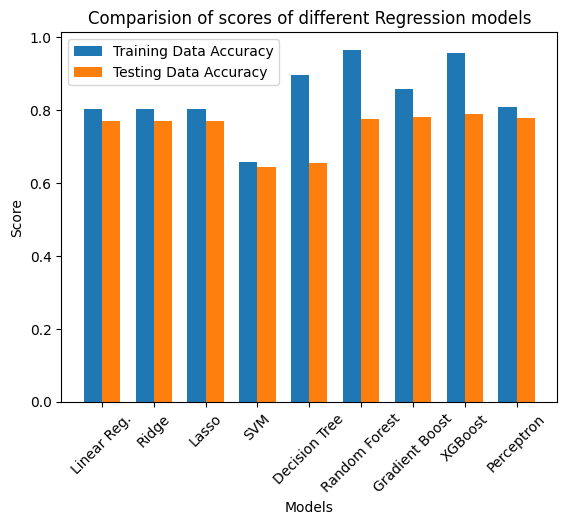

In [130]:
model_names = ['Linear Reg.', 'Ridge', 'Lasso', 'SVM','Decision Tree','Random Forest','Gradient Boost','XGBoost','Perceptron']
train_scores = [lr.score(x_train,y_train), ridge_model.score(x_train,y_train), lasso_model.score(x_train,y_train),svr_model.score(x_train,y_train),dt_model.score(x_train,y_train),rf_model.score(x_train,y_train),gb_model.score(x_train,y_train),xgb_model.score(x_train,y_train),nn_model.score(x_train,y_train)]
test_scores = [lr.score(x_test,y_test), ridge_model.score(x_test,y_test), lasso_model.score(x_test,y_test),svr_model.score(x_test,y_test),dt_model.score(x_test,y_test),rf_model.score(x_test,y_test),gb_model.score(x_test,y_test),xgb_model.score(x_test,y_test),nn_model.score(x_test,y_test)]
# Width of each bar
bar_width = 0.35

length = np.arange(len(model_names))
plt.bar(length, train_scores, width=bar_width, label='Training Data Accuracy')
plt.bar(length + bar_width, test_scores, width=bar_width, label='Testing Data Accuracy')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparision of scores of different Regression models')
plt.xticks(length + bar_width / 2, model_names)
plt.legend()
plt.xticks(rotation=45)
# Display the plot
plt.show()

#### Clearly visible that XGBoost is most efficient one among all. So we will move forward with this.

In [131]:
final_model = xgb.XGBRegressor()

In [132]:
final_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [133]:
data.head()

,active,amenities,balconies,bathroom,combineDescription,completeStreetName,deposit,facing,facingDesc,floor,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",3,3,NaN,"Shreya carnation, Block I, NCB Enclave, Gachib...",90000,W,West,3,...,1,1,1,1,1,1,1,1,1,1
1,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,NaN,"Inner Ring Rd, near RTO Bandlaguda South Zone",45000,E,East,2,...,1,1,1,1,1,1,1,1,1,1
2,True,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",3,3,NaN,"Rd Number 2, Shirdi Sai Nagar, Manikonda, Hyde...",80000,E,East,0,...,1,1,1,1,1,1,1,1,1,1
3,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,NaN,"Plot No. 44, Road No. 1/A, kakatiya colony, LB...",18000,W,West,2,...,1,1,1,1,1,1,1,1,1,1
4,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",2,2,NaN,"Madhapur HUDA Techno Enclave, Near MaxCure Su...",80000,E,East,2,...,1,1,1,1,1,1,1,1,1,1


#### Function for outputing the features of the required property

In [134]:
def price_prediction(bhk, property_age, property_size, totalfloors, facing, furnishing, locality, park, waterSupply, number_of_amenities):
    X = np.zeros(len(x.columns))
    X[0] = bhk
    X[1] = property_age
    X[2] = property_size
    X[3] = totalfloors
    X[97] = number_of_amenities
    
    columns = ['locality', 'facing', 'furnishing', 'parking', 'waterSupply']
    values = [locality, facing, furnishing, park, waterSupply]
    
    for column, value in zip(columns, values):
        if value in x.columns:
            X[x.columns.get_loc(value)] = 1
    
    return X

## Sample prediction

In [138]:
input_data = price_prediction(2, 3, 1000, 10, 'East', 'Semi', 'Madhapur', 'BOTH', 'BOREWELL', 9)
prediction = final_model.predict(input_data.reshape((1, -1)))[0]


In [139]:
prediction

23696.041

## Saving the final model

In [140]:
import joblib